# Тема “Обучение без учителя”


Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [29]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [30]:
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_train_scaled=pd.DataFrame(X_test_scaled, columns=boston.feature_names)


In [36]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [40]:
X_train_tsne= tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[-8.46654475e-02, -9.09478855e+00],
       [-4.06562519e+00, -4.91367960e+00],
       [ 4.35094738e+00, -5.12193918e+00],
       [-3.68255186e+00, -8.59845257e+00],
       [ 6.02345276e+00, -3.11294389e+00],
       [-1.08000350e+00, -7.69099951e+00],
       [ 1.08789079e-01, -6.97110081e+00],
       [ 3.51543427e+00, -5.58331394e+00],
       [ 5.13430929e+00, -3.08600760e+00],
       [ 8.50572467e-01, -7.26510954e+00],
       [-3.22340894e+00, -4.16470432e+00],
       [-1.24080908e+00, -6.46513128e+00],
       [ 9.07792950e+00, -4.16818953e+00],
       [-1.87813437e+00, -7.94151115e+00],
       [-6.47770286e-01, -7.80586672e+00],
       [ 5.15666771e+00, -2.47492075e+00],
       [ 2.78150916e+00, -6.31367159e+00],
       [ 7.45066547e+00, -4.44129801e+00],
       [-5.84655952e+00, -1.17684040e+01],
       [ 6.36432076e+00, -3.16007757e+00],
       [-3.66662216e+00, -9.50389099e+00],
       [-4.05184031e+00, -1.02018156e+01],
       [ 6.37586892e-01, -6.13795137e+00],
       [ 1.

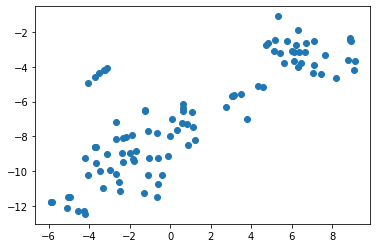

In [42]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.


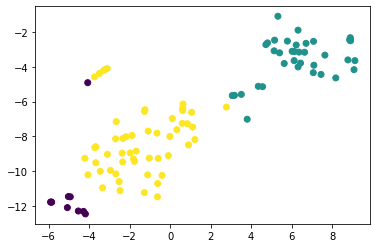

In [43]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.



In [45]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:


ValueError: Item wrong length 102 instead of 404.

3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [46]:
labels_test = kmeans.predict(X_test_scaled)

In [47]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    34.12
dtype: float64
Кластер 1: price    16.710526
dtype: float64
Кластер 2: price    22.511111
dtype: float64
Средние значения CRIM:
Кластер 0: 0.042277
Кластер 1: 9.419181842105264
Кластер 2: 0.22231277777777778
